# Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("resultat_städad.csv")
summary_klass = pd.read_csv("summary_by_class.csv")

df.head(3), summary_klass

(    student  studietimmar  provpoäng klass  poang_per_timme
 0  Elev 065           0.7       55.0     B        78.571429
 1  Elev 059           0.0       94.0     A              NaN
 2  Elev 060           8.0      100.0     A        12.500000,
   klass  antal  medel_poäng  median_poäng  std_poäng  medel_timmar
 0     A     25    85.720000          89.0  11.900700      5.184000
 1     B     27    73.148148          70.0  13.863909      4.685185
 2     C     26    71.307692          70.0   9.926809      3.915385)

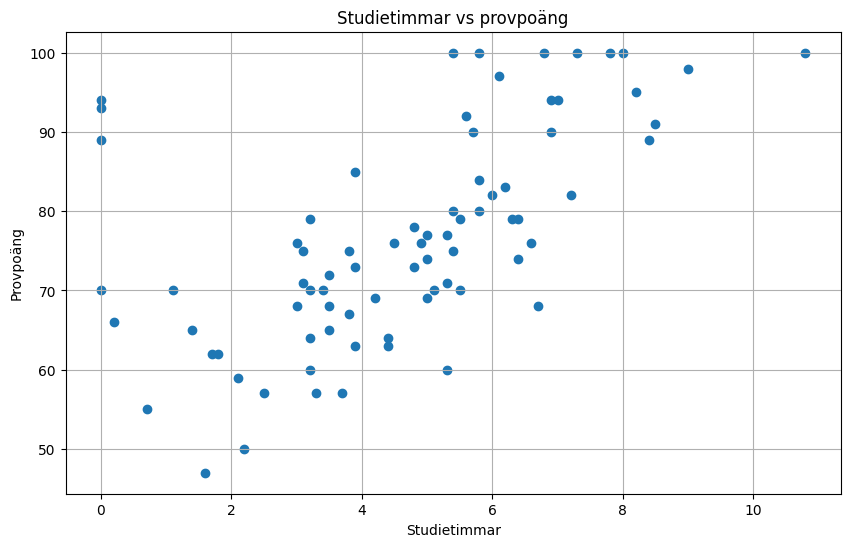

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(df.studietimmar, df["provpoäng"])
plt.title("Studietimmar vs provpoäng")
plt.xlabel("Studietimmar")
plt.ylabel("Provpoäng")
plt.grid(True)

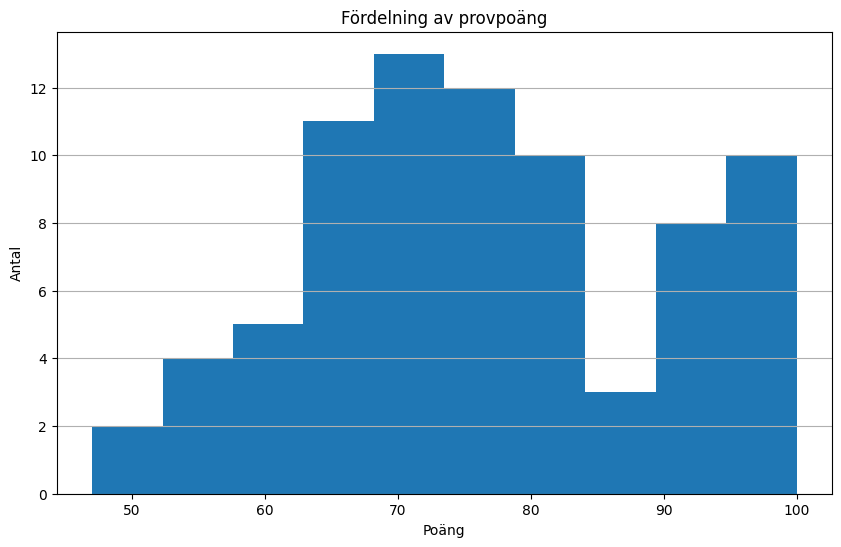

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

df.provpoäng.plot(kind="hist", bins=10, ax=ax)
ax.set_title("Fördelning av provpoäng")
ax.set_xlabel("Poäng")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")

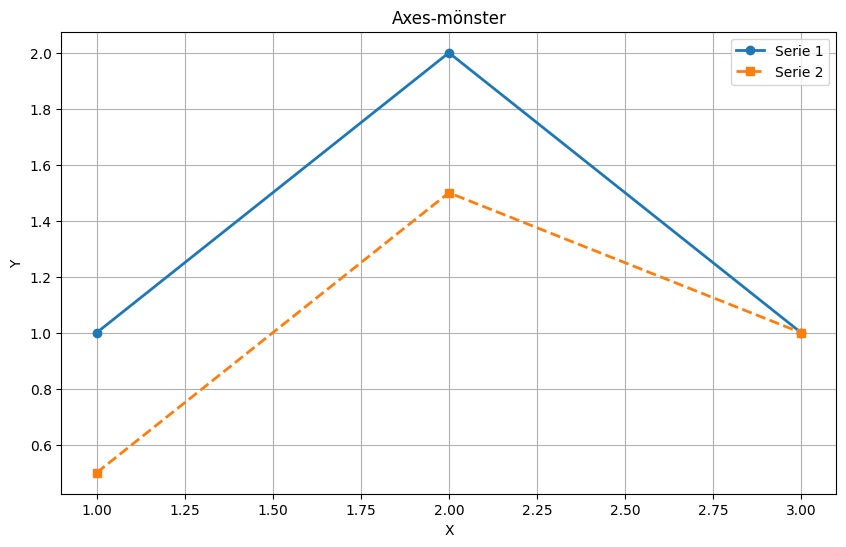

In [40]:
x = [1, 2, 3]
y1 = [1, 2, 1]
y2 = [0.5, 1.5, 1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y1, marker="o", linestyle="-", linewidth=2, label="Serie 1")
ax.plot(x, y2, marker="s", linestyle="--", linewidth=2, label="Serie 2")
ax.set_title("Axes-mönster")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)
ax.legend()
# plt.tight_layout()

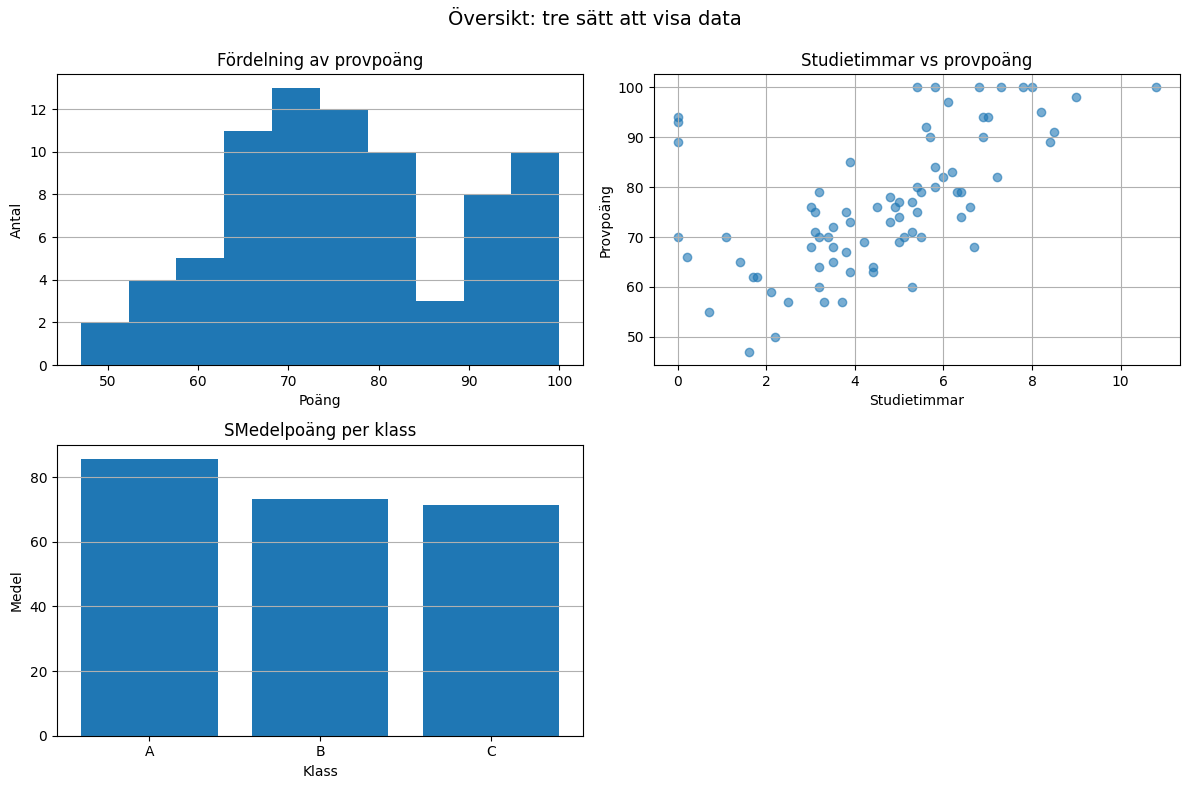

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False, sharey=False)

axes[0,0].hist(df.provpoäng.dropna(), bins=10)
axes[0,0].set_title("Fördelning av provpoäng")
axes[0,0].set_xlabel("Poäng")
axes[0,0].set_ylabel("Antal")
axes[0,0].grid(True, axis="y")

axes[0,1].scatter(df.studietimmar, df.provpoäng, alpha=0.6)
axes[0,1].set_title("Studietimmar vs provpoäng")
axes[0,1].set_xlabel("Studietimmar")
axes[0,1].set_ylabel("Provpoäng")
axes[0,1].grid(True)

axes[1,0].bar(summary_klass.klass, summary_klass.medel_poäng)
axes[1,0].set_title("SMedelpoäng per klass")
axes[1,0].set_xlabel("Klass")
axes[1,0].set_ylabel("Medel")
axes[1,0].grid(True, axis="y")

axes[1,1].axis("off")

fig.suptitle("Översikt: tre sätt att visa data", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

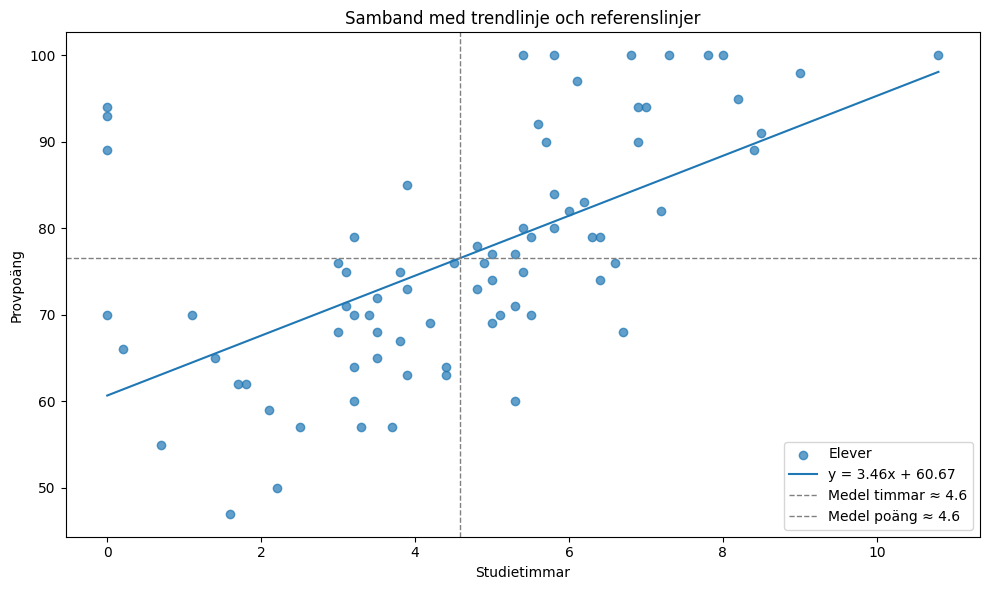

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df.studietimmar.to_numpy()
y = df["provpoäng"].to_numpy()

ax.scatter(x, y, alpha=0.7, label="Elever")

# Trendlinje
# y = kx + m
# y = mx + b
k, m = np.polyfit(x, y, 1)
ix = np.argsort(x)
ax.plot(x[ix], (k*x + m)[ix], label=rf"y = {k:.2f}x + {m:.2f}")

# referenslinjer (medel)
ax.axvline(x.mean(), linestyle="--", color="0.5", linewidth=1, label=f"Medel timmar ≈ {x.mean():.1f}")
ax.axhline(y.mean(), linestyle="--", color="0.5", linewidth=1, label=f"Medel poäng ≈ {x.mean():.1f}")

ax.set_title("Samband med trendlinje och referenslinjer")
ax.set_xlabel("Studietimmar")
ax.set_ylabel("Provpoäng")
ax.legend(loc="lower right")

plt.tight_layout()

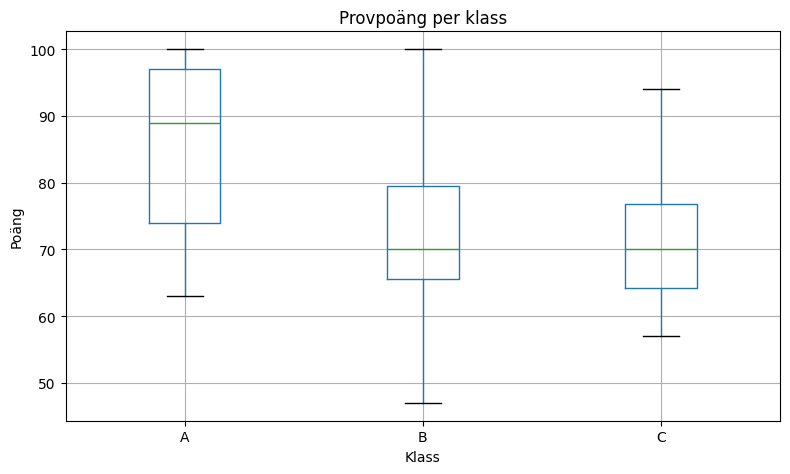

In [95]:
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column="provpoäng", by="klass", ax=ax)
ax.set_title("Provpoäng per klass")
ax.set_xlabel("Klass")
ax.set_ylabel("Poäng")
plt.suptitle("")
plt.tight_layout()

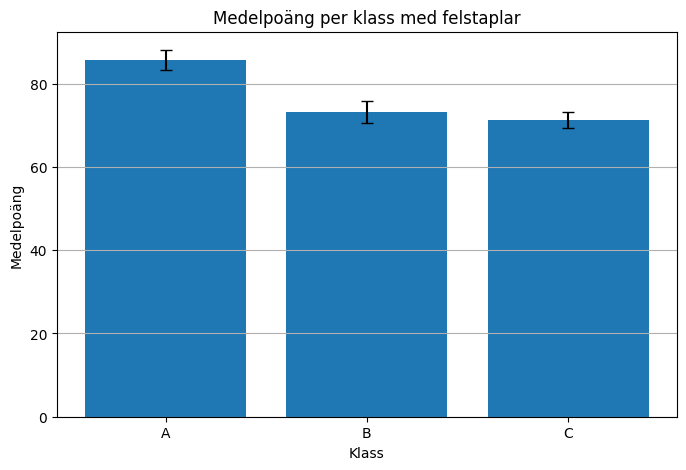

In [102]:
kategorier = summary_klass["klass"]
mean = summary_klass.medel_poäng
std = summary_klass.std_poäng
n = summary_klass.antal

se = std / np.sqrt(n)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(kategorier, mean, yerr=se, capsize=4)
ax.set_title("Medelpoäng per klass med felstaplar")
ax.set_xlabel("Klass")
ax.set_ylabel("Medelpoäng")
ax.grid(True, axis="y")

[None, None, None, None, None, None]

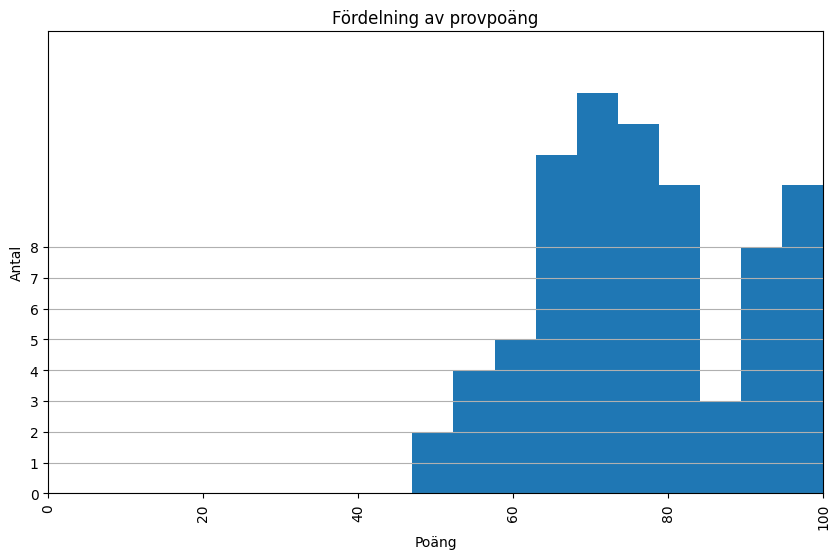

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))

df.provpoäng.plot(kind="hist", bins=10, ax=ax)
ax.set_title("Fördelning av provpoäng")
ax.set_xlabel("Poäng")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
ax.set_xlim(0, 100)
ax.set_ylim(0, 15)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.setp(ax.get_xticklabels(), rotation=90)